# SIMULATION OF A PID CONTROLLER

Given an error signal $e(t)$, we can command a machine with the following control signal $u(t) = P + I + D$.

Proportional $P = K_p e(t)$, Integral $I = \int K_i e(t)$, Derivative $D = K_d \frac{d e(t)}{dt}$, where $K_p, K_i, $ and $K_i$ are (typically positive) constants.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class airco_in_a_room:
    def __init__(self, t, t_outside):
        self.t_outside = t_outside # temperature outside of the room
        self.t = t # initial temperature
        self.u = 0 # actuator command temperature/time
        
    def sim_step(self, dT):
        self.t = self.t + (self.t_outside - self.t)*dT + self.u*dT
        
    def set_command(self, u):
        self.u = u
        
    def get_current_temp(self):
        return self.t

# Example of leaving the airco on with a constant command

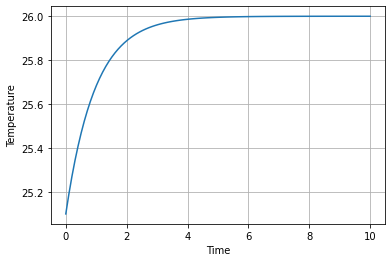

In [27]:
airco = airco_in_a_room(25, 25)

log_time = np.linspace(0, 10, 100)
log_t = np.zeros_like(log_time)
dt = 10.0/100.0

for i in range(np.size(log_time)):
    airco.set_command(1)
    airco.sim_step(dt)
                 
    log_t[i] = airco.get_current_temp()
                 
fig, axis = plt.subplots(1,1)
axis.plot(log_time, log_t)
axis.set_xlabel("Time")
axis.set_ylabel("Temperature")
axis.grid()

# Assigment 15 March
The desired temperature is 22 degrees. Start from a random temperature inside, and a random temperature outside. Construct the error signal, and with only a PI controller (no need of derivative now) command the airco to reach the desired temperature in the room.

Plot the temperature signal in the room, and the command to the airco vs time.